# Tissue Geometry Examples

Collate examples of complex tissue geometries/architectures/orientations to highlight the limitations of Belayer to deal with these structures
* colon/CD/A
* colon/CD/B
* colon/CD/C

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.colors import to_rgba
from matplotlib.patches import Circle

%matplotlib inline

sys.path.append('/mnt/data1/spatial/tissue-alignment/traversal')
from io_utils import read_image, read_spatial_data, read_transcription_data, read_embedding_data
from plot import draw_start, draw_path, draw_clusters
from graph import compute_distance_matrix, compute_path_idxs, compute_clusters, compute_path_counts

In [2]:
model = 'triplet-gi-0999'
fullres = False

path1 = '/mnt/data1/spatial/data/colon/CD/A'
path2 = '/mnt/data1/spatial/data/colon/CD/B'
path3 = '/mnt/data1/spatial/data/colon/CD/C'
im1 = read_image(path1, fullres)
im2 = read_image(path2, fullres)
im3 = read_image(path3, fullres)

pos_df1, spot_radius1 = read_spatial_data(path1, fullres)
pos_df2, spot_radius2 = read_spatial_data(path2, fullres)
pos_df3, spot_radius3 = read_spatial_data(path3, fullres)

embeds1 = read_embedding_data(path1, model)
embeds2 = read_embedding_data(path2, model)
embeds3 = read_embedding_data(path3, model)

start1 = 2462
end1 = 524

start2 = 2496
end2 = 1350

start3 = 3257
end3 = 1863

dists1, hex1 = compute_distance_matrix(embeds1, pos_df1)
path_idxs1 = compute_path_idxs(dists1, hex1, start1, end1)
clusters1 = compute_clusters(embeds1, embeds1[path_idxs1])

dists2, hex2 = compute_distance_matrix(embeds2, pos_df2)
path_idxs2 = compute_path_idxs(dists2, hex2, start2, end2)
clusters2 = compute_clusters(embeds2, embeds2[path_idxs2])

dists3, hex3 = compute_distance_matrix(embeds3, pos_df3)
path_idxs3 = compute_path_idxs(dists3, hex3, start3, end3)
clusters3 = compute_clusters(embeds3, embeds3[path_idxs3])

In [3]:
def draw_spots(ax, spot_radius, pos_df):
    circs = PatchCollection(
        [Circle((x, y), spot_radius) for x, y in pos_df[["x", "y"]].to_numpy()],
        picker=True,
    )
    facecolors = np.asarray([list(to_rgba("lightgray"))] * len(pos_df))
    edgecolors = np.asarray([list(to_rgba("darkgray"))] * len(pos_df))
    alphas = np.full(len(pos_df), 1)
    circs.set_facecolor(facecolors)
    circs.set_edgecolor(edgecolors)
    circs.set_alpha(alphas)
    ax.add_collection(circs)
    return circs, facecolors, edgecolors, alphas

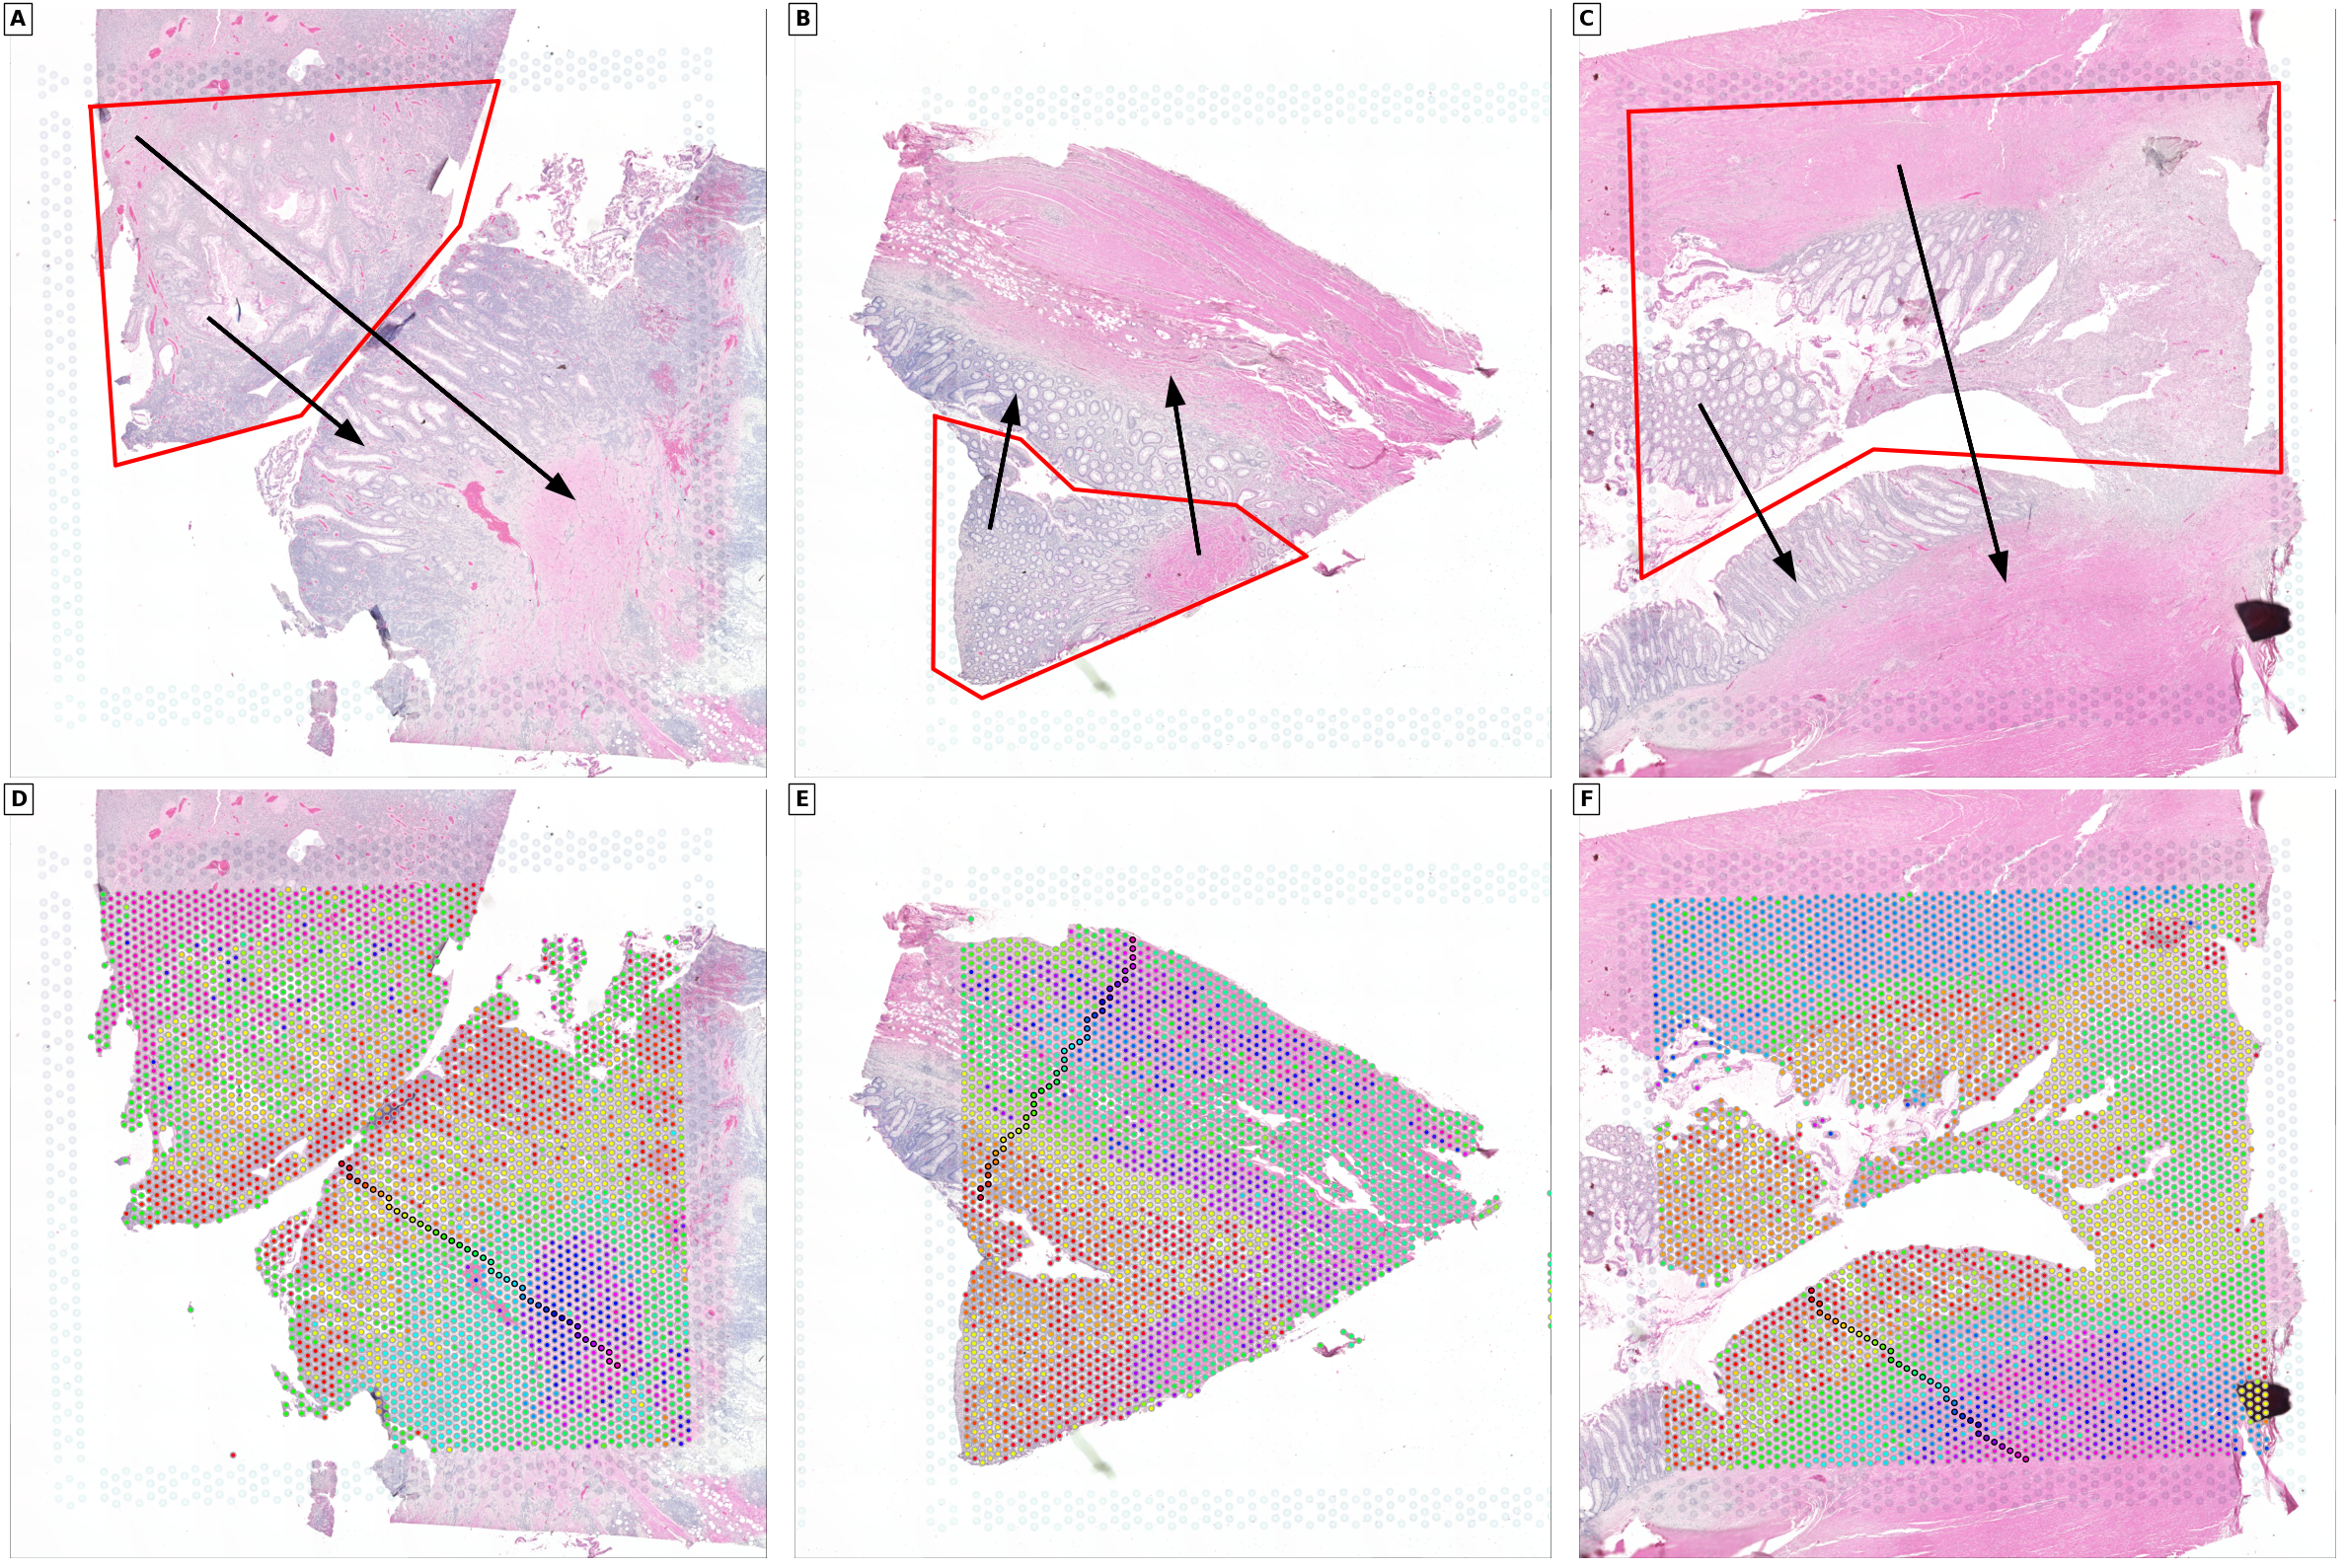

In [4]:
figsize = 8
fontsize = 15
nrows = 2
ncols = 3

plt.close()
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows, ncols, figsize=(figsize*ncols, figsize*nrows))

ax1.imshow(im1)
ax2.imshow(im2)
ax3.imshow(im3)

ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()

ax1.plot(
    [209, 274, 757, 1170, 1271, 209],
    [254, 1187, 1057, 563, 187, 254],
    color='red',
    lw=3,
)
ax1.arrow(
    331, 335,
    1458-331, 1267-335,
    lw=3,
    head_width=40,
    zorder=3,
    color='black',
    length_includes_head=True,
)
ax1.arrow(
    518, 805,
    910-518, 1127-805,
    lw=3,
    head_width=40,
    zorder=3,
    color='black',
    length_includes_head=True,
)

ax2.plot(
    [365, 588, 726, 1147, 1331, 487, 360, 365],
    [1059, 1119, 1249, 1290, 1423, 1792, 1716, 1059],
    color='red',
    lw=3,
)
ax2.arrow(
    508, 1348,
    573-508, 1015-1348,
    lw=3,
    head_width=40,
    zorder=3,
    color='black',
    length_includes_head=True,
)
ax2.arrow(
    1051, 1415,
    980-1051, 968-1415,
    lw=3,
    head_width=40,
    zorder=3,
    color='black',
    length_includes_head=True,
)

ax3.plot(
    [128, 162, 765, 1825, 1819, 128],
    [267, 1480, 1145, 1205, 192, 267],
    color='red',
    lw=3,
)
ax3.arrow(
    315, 1031,
    557-315, 1477-1031,
    lw=3,
    head_width=40,
    zorder=3,
    color='black',
    length_includes_head=True,
)
ax3.arrow(
    832, 410,
    1105-832, 1477-410,
    lw=3,
    head_width=40,
    zorder=3,
    color='black',
    length_includes_head=True,
)

ax4.imshow(im1)
ax5.imshow(im2)
ax6.imshow(im3)

ax4.set_axis_off()
ax5.set_axis_off()
ax6.set_axis_off()

circs1, facecolors1, edgecolors1, alphas1 = draw_spots(ax4, spot_radius1, pos_df1)
circs2, facecolors2, edgecolors2, alphas2 = draw_spots(ax5, spot_radius2, pos_df2)
circs3, facecolors3, edgecolors3, alphas3 = draw_spots(ax6, spot_radius3, pos_df3)

fig.tight_layout()

draw_start(ax4, pos_df1, start1, None, circs1, edgecolors1)
draw_path(ax4, pos_df1, path_idxs1, None, circs1, edgecolors1)
draw_clusters(fig, ax4, path_idxs1, clusters1, circs1, facecolors1, show_cbar=False)

draw_start(ax5, pos_df2, start2, None, circs2, edgecolors2)
draw_path(ax5, pos_df2, path_idxs2, None, circs2, edgecolors2)
draw_clusters(fig, ax5, path_idxs2, clusters2, circs2, facecolors2, show_cbar=False)

draw_start(ax5, pos_df3, start3, None, circs3, edgecolors3)
draw_path(ax5, pos_df3, path_idxs3, None, circs3, edgecolors3)
draw_clusters(fig, ax5, path_idxs3, clusters3, circs3, facecolors3, show_cbar=False)

ax1_bbox = ax1.get_position()
ax2_bbox = ax2.get_position()
ax3_bbox = ax3.get_position()
ax4_bbox = ax4.get_position()
ax5_bbox = ax5.get_position()
ax6_bbox = ax6.get_position()

fig.text(ax1_bbox.xmin, ax1_bbox.ymax, 'A', ha='left', va='top', fontsize=fontsize, weight='bold', bbox={'facecolor':'white', 'edgecolor':'black'})
fig.text(ax2_bbox.xmin, ax2_bbox.ymax, 'B', ha='left', va='top', fontsize=fontsize, weight='bold', bbox={'facecolor':'white', 'edgecolor':'black'})
fig.text(ax3_bbox.xmin, ax3_bbox.ymax, 'C', ha='left', va='top', fontsize=fontsize, weight='bold', bbox={'facecolor':'white', 'edgecolor':'black'})
fig.text(ax4_bbox.xmin, ax4_bbox.ymax, 'D', ha='left', va='top', fontsize=fontsize, weight='bold', bbox={'facecolor':'white', 'edgecolor':'black'})
fig.text(ax5_bbox.xmin, ax5_bbox.ymax, 'E', ha='left', va='top', fontsize=fontsize, weight='bold', bbox={'facecolor':'white', 'edgecolor':'black'})
fig.text(ax6_bbox.xmin, ax6_bbox.ymax, 'F', ha='left', va='top', fontsize=fontsize, weight='bold', bbox={'facecolor':'white', 'edgecolor':'black'})

fig.savefig('fig7.png')